In [135]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [136]:
df = pd.read_csv("master.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Выбираем по каким столбцам кластеризуем

In [137]:
columns=['suicides_no', 'gdp_per_capita ($)']

In [138]:
from sklearn import preprocessing
dfN = preprocessing.MinMaxScaler().fit_transform(df[columns].values)

In [139]:
n_clusters = 3
kmeans = KMeans(n_clusters, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dfN)

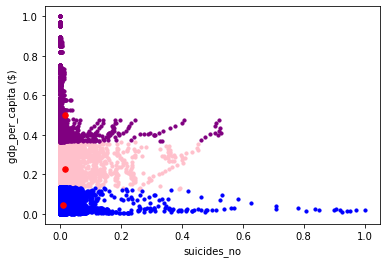

In [140]:
plt.scatter(dfN[y_kmeans == 0, 0], dfN[y_kmeans == 0, 1], s = 10, c = 'pink')
plt.scatter(dfN[y_kmeans == 1, 0], dfN[y_kmeans == 1, 1], s = 10, c = 'blue')
plt.scatter(dfN[y_kmeans == 2, 0], dfN[y_kmeans == 2, 1], s = 10, c = 'purple')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red')
plt.xlabel('suicides_no')
plt.ylabel('gdp_per_capita ($)')
plt.show()